In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import lib_points as lp
import lines 
from matplotlib2tikz import save as tikz_save


In [4]:
cd ~/HPT_500k/

/mnt/drive2/re_500k


In [5]:
case_folders=['HPT_LS05_DOM30_TI5/','HPT_LS05_DOM30_TI20/','HPT_LS20_DOM80_TI5/','HPT_LS20_DOM80_TI20/']
case_names=['TI06 L05','TI20 L05','TI06 L20', 'TI20 L20']
colors=['b','r','g','k','brown','m']

In [46]:
probes=[]
for i in range(4):
    probes.append(lp.point_probe('%s/mon_point/point_1.hdf5'%(case_folders[i])))
    probes[-1].load_time_series(start_time=95)
    probes[-1].turb_spec(nfft=16384,noverlap=8192)
probes2=[]
for i in range(4):
    probes2.append(lp.point_probe('%s/mon_point/point_2.hdf5'%(case_folders[i])))
    probes2[-1].load_time_series(start_time=95)
    probes2[-1].turb_spec(nfft=16384,noverlap=8192)

Loading monitor point located at -0.2987, 0.0010
The file contains a time series between nit=4505103 at time 84.85 and  nit=5515101 at time 108.08.
Span spectras have been collected 44 intervalls from nit 4505103 to 5515102.
The data contains invalid entries (probably resulting from inproper writing). The series is truncated and now starts at 95.00 and ends at 108.08
sampling frequency of the dataset is 21739.130435
The estimates for the standard deviation for the current series are:
u_1'=0.0737
u_2'=0.0488
u_3'=0.0505
The isotropy of the turbulence is 1.512
Loading monitor point located at -0.2987, 0.0010
The file contains a time series between nit=4535103 at time 85.54 and  nit=5595101 at time 107.16.
Span spectras have been collected 33 intervalls from nit 4535103 to 5595102.
The data contains invalid entries (probably resulting from inproper writing). The series is truncated and now starts at 95.00 and ends at 107.16
sampling frequency of the dataset is 25000.000000
The estimates f

<IPython.core.display.Javascript object>


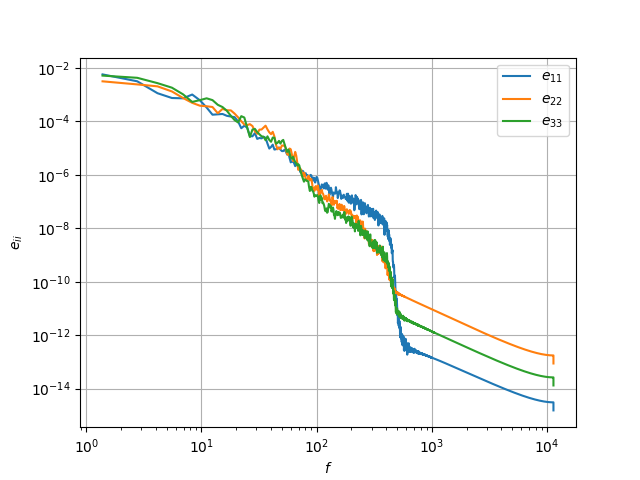

In [8]:
point_index=0
#compute -5/3 law
m53=probes[point_index].ts.spec['e_11'][2]*(probes[point_index].ts.spec['f'][:]
                                           /probes[point_index].ts.spec['f'][2])**(-5./3.)
#plot
plt.figure()
# plt.loglog(probes[point_index].ts.spec['f'],m53,label='$-5/3$')
# plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_11'],label='$e_{11}$')
# plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_22'],label='$e_{22}$')
# plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_33'],label='$e_{33}$')
# point_index=1
# plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_11'],label='$e_{11}$')
# plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_22'],label='$e_{22}$')
# plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_33'],label='$e_{33}$')
point_index=3
plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_11'],label='$e_{11}$')
plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_22'],label='$e_{22}$')
plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_33'],label='$e_{33}$')
plt.legend()
plt.grid()
plt.xlabel('$f$')
plt.ylabel('$e_{ii}$')

In [11]:
data_arts=np.loadtxt('exp_spectra_inlet.csv',delimiter=',',skiprows=1)
data_font=np.loadtxt('exp_spectra_inlet_fontanento.csv',delimiter=',',skiprows=1)
c_arts=61.
c_ax_exp=0.036985

In [33]:
data_arts_no_peak=np.concatenate([data_arts[:3,:],data_arts[4:6,:],data_arts[8:,:]],axis=0)

<IPython.core.display.Javascript object>


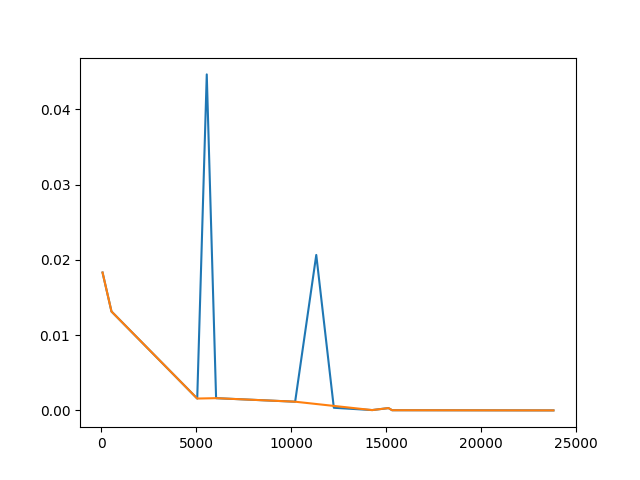

In [34]:
plt.figure()
plt.plot(data_arts[:,0],data_arts[:,1])
plt.plot(data_arts_no_peak[:,0],data_arts_no_peak[:,1])

In [41]:
fact_arts=0.04/50.8
turb_intensity_arts=np.trapz(data_arts[:,1], x=data_arts[:,0])
turb_intensity_arts_no_peak=np.trapz(fact*data_arts_no_peak[:,1], x=data_arts_no_peak[:,0])
turb_intensity_font=np.trapz(data_font[:,1], x=data_font[:,0])
print turb_intensity_arts,turb_intensity_arts_no_peak


92.0410842791 0.0400223847005


In [42]:
c_LS5=1.0
c_LS20=1.0
cax_DNS=1.01125574112

<IPython.core.display.Javascript object>


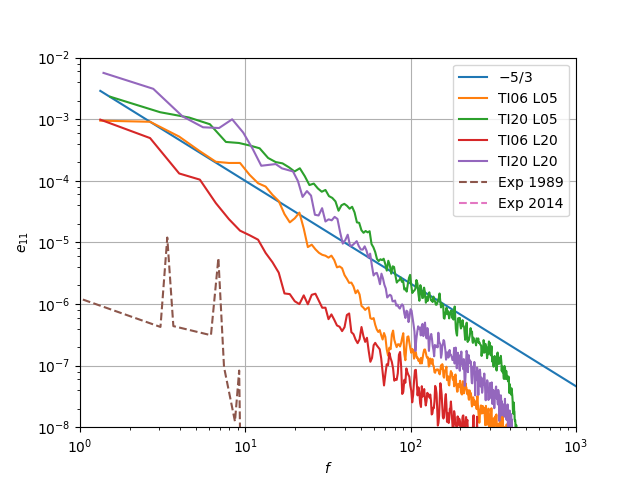

<IPython.core.display.Javascript object>


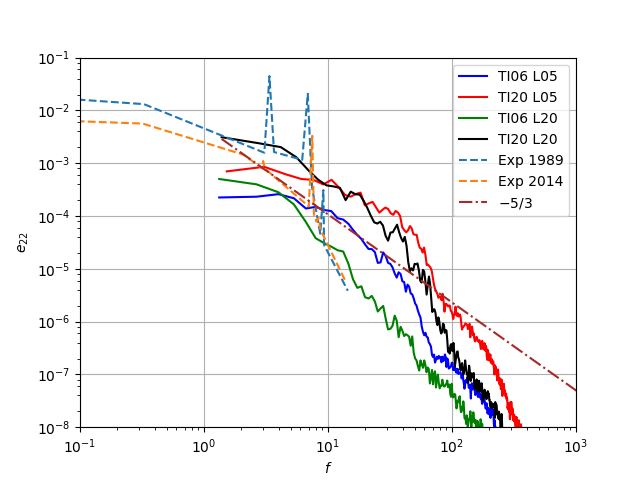

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


<IPython.core.display.Javascript object>


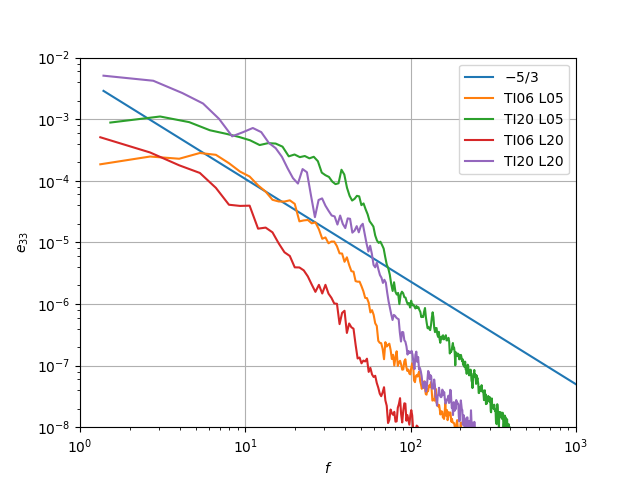

(1e-08, 0.01)

In [45]:
# for paper only plot one component since all are similar
point_index=0
#compute -5/3 law
m53=probes[point_index].ts.spec['e_11'][2]*(probes[point_index].ts.spec['f'][:]
                                           /probes[point_index].ts.spec['f'][2])**(-5./3.)
#plot
plt.figure()
plt.loglog(probes[point_index].ts.spec['f'],m53,label='$-5/3$')
for point_index in range(4):
    plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_11'],label=case_names[point_index])
plt.loglog(data_arts[:,0]*c_ax_exp/c_arts,data_arts[:,1]/c_arts**2,'--',label='Exp 1989')
plt.loglog(data_font[:,0]*c_ax_exp/c_arts,data_font[:,1]/c_arts**2,'--',label='Exp 2014')
plt.legend(loc=0)
plt.grid()
plt.xlabel('$f$')
plt.ylabel('$e_{11}$')
plt.xlim([1,1000])
plt.ylim([10**(-8),10**(-2)])

plt.figure()
for point_index in range(4):
    plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_22'],
               label=case_names[point_index],color=colors[point_index])
plt.loglog(data_arts[:,0]*c_ax_exp/c_arts,data_arts[:,1],'--',label='Exp 1989')
plt.loglog(data_font[:,0]*c_ax_exp/c_arts,data_font[:,1]*0.0000001,'--',label='Exp 2014')
plt.loglog(probes[point_index].ts.spec['f'],m53,label='$-5/3$',color='brown',linestyle=
          '-.')
plt.legend(loc=0)
plt.grid()
plt.xlabel('$f$')
plt.ylabel('$e_{22}$')
plt.xlim([0.1,1000])
plt.ylim([10**(-8),10**(-1)])
tikz_save('inlet_spectra.tikz',figurewidth='\\fw',figureheight='\\fh')

plt.figure()
plt.loglog(probes[point_index].ts.spec['f'],m53,label='$-5/3$')
for point_index in range(4):
    plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_33'],label=case_names[point_index])
plt.legend(loc=0)
plt.grid()
plt.xlabel('$f$')
plt.ylabel('$e_{33}$')
plt.xlim([1,1000])
plt.ylim([10**(-8),10**(-2)])

<IPython.core.display.Javascript object>


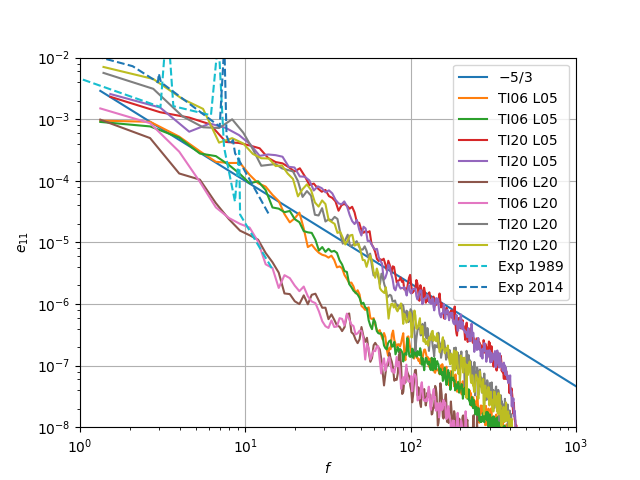

<IPython.core.display.Javascript object>


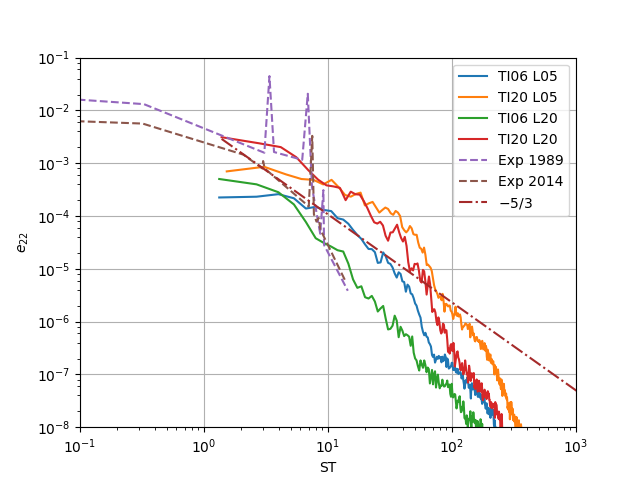

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


<IPython.core.display.Javascript object>


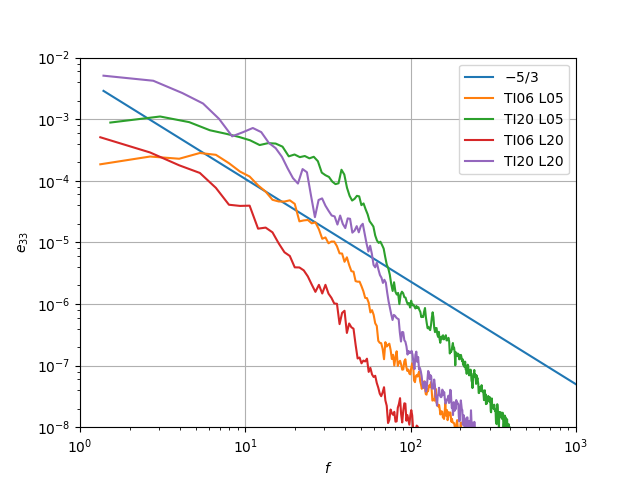

(1e-08, 0.01)

In [52]:
# for paper only plot one component since all are similar
point_index=0
#compute -5/3 law
m53=probes[point_index].ts.spec['e_11'][2]*(probes[point_index].ts.spec['f'][:]
                                           /probes[point_index].ts.spec['f'][2])**(-5./3.)
#plot
plt.figure()
plt.loglog(probes[point_index].ts.spec['f'],m53,label='$-5/3$')
for point_index in range(4):
    plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_11'],label=case_names[point_index])
    plt.loglog(probes2[point_index].ts.spec['f'],probes2[point_index].ts.spec['e_11'],label=case_names[point_index])    
plt.loglog(data_arts[:,0]*c_ax_exp/c_arts,data_arts[:,1],'--',label='Exp 1989')
plt.loglog(data_font[:,0]*c_ax_exp/c_arts,data_font[:,1]*0.0000005,'--',label='Exp 2014')
plt.legend(loc=0)
plt.grid()
plt.xlabel('$f$')
plt.ylabel('$e_{11}$')
plt.xlim([1,1000])
plt.ylim([10**(-8),10**(-2)])

plt.figure()
for point_index in range(4):
    plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_22'],
               label=case_names[point_index])
    #plt.loglog(probes2[point_index].ts.spec['f'],probes2[point_index].ts.spec['e_22'],label=case_names[point_index])     
plt.loglog(data_arts[:,0]*c_ax_exp/c_arts,data_arts[:,1],'--',label='Exp 1989')
plt.loglog(data_font[:,0]*c_ax_exp/c_arts,data_font[:,1]*0.0000001,'--',label='Exp 2014')
plt.loglog(probes[point_index].ts.spec['f'],m53,label='$-5/3$',color='brown',linestyle=
          '-.')
plt.legend(loc=0)
plt.grid()
plt.xlabel('ST')
plt.ylabel('$e_{22}$')
plt.xlim([0.1,1000])
plt.ylim([10**(-8),10**(-1)])
tikz_save('inlet_spectra.tikz',figurewidth='\\fw',figureheight='\\fh')

plt.figure()
plt.loglog(probes[point_index].ts.spec['f'],m53,label='$-5/3$')
for point_index in range(4):
    plt.loglog(probes[point_index].ts.spec['f'],probes[point_index].ts.spec['e_33'],label=case_names[point_index])
plt.legend(loc=0)
plt.grid()
plt.xlabel('$f$')
plt.ylabel('$e_{33}$')
plt.xlim([1,1000])
plt.ylim([10**(-8),10**(-2)])